In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
columns=['user_id','order_dt','quantity','payment']
df=pd.read_csv('transaction_demo',names=columns,sep=',')
df.head()

,user_id,order_dt,quantity,payment
0,100017,2018-02-10,3,841
1,100004,2018-03-19,1,342
2,100019,2018-04-16,5,164
3,100016,2018-03-13,4,531
4,100013,2018-01-23,7,158


In [5]:
df.describe()

,user_id,quantity,payment
count,100.000000,100.000000,100.000000
mean,100010.070000,5.760000,500.770000
std,5.937818,2.719626,275.415787
min,100001.000000,1.000000,59.000000
25%,100005.000000,4.000000,229.000000
50%,100009.500000,6.000000,476.000000
75%,100016.000000,8.000000,740.750000
max,100020.000000,10.000000,994.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
user_id     100 non-null int64
order_dt    100 non-null object
quantity    100 non-null int64
payment     100 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [10]:
df['std_dt']=pd.to_datetime(df.order_dt,format='%Y-%m-%d')

In [11]:
df.head()

,user_id,order_dt,quantity,payment,std_dt
0,100017,2018-02-10,3,841,2018-02-10
1,100004,2018-03-19,1,342,2018-03-19
2,100019,2018-04-16,5,164,2018-04-16
3,100016,2018-03-13,4,531,2018-03-13
4,100013,2018-01-23,7,158,2018-01-23


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
user_id     100 non-null int64
order_dt    100 non-null object
quantity    100 non-null int64
payment     100 non-null int64
std_dt      100 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.0+ KB


In [19]:
df.groupby('user_id').payment.sum().head()

user_id
100001    1313
100002    4370
100003    1939
100004    2278
100005    1790
Name: payment, dtype: int64

In [21]:
df.groupby('std_dt').payment.sum()

std_dt
2018-01-16     118
2018-01-20     754
2018-01-22     148
2018-01-23     577
2018-01-25     498
2018-01-26     785
2018-01-27    1356
2018-01-28     170
2018-01-31    2382
2018-02-01     932
2018-02-03     717
2018-02-04     782
2018-02-05     720
2018-02-08     471
2018-02-09     888
2018-02-10     841
2018-02-11     539
2018-02-13     232
2018-02-16     588
2018-02-19     973
2018-02-21     498
2018-02-23    1476
2018-02-24    1394
2018-02-25     673
2018-02-26     925
2018-02-27    1365
2018-02-28     790
2018-03-01     650
2018-03-05    1130
2018-03-06    1381
2018-03-07     614
2018-03-11    1412
2018-03-12    1156
2018-03-13     531
2018-03-16     157
2018-03-17     434
2018-03-19    1336
2018-03-20    1004
2018-03-22     931
2018-03-23     749
2018-03-24     849
2018-03-27     372
2018-03-28    1421
2018-03-29    1414
2018-03-30    1691
2018-04-03    1048
2018-04-04    1666
2018-04-05     427
2018-04-07     941
2018-04-09     988
2018-04-11    1213
2018-04-13    1460
2018-

In [18]:
df.groupby('user_id').sum().describe()

,quantity,payment
count,20.00000,20.000000
mean,28.80000,2503.850000
std,13.31244,1220.473949
min,6.00000,194.000000
25%,20.00000,1741.750000
50%,27.50000,2304.500000
75%,40.00000,3129.500000
max,54.00000,5435.000000


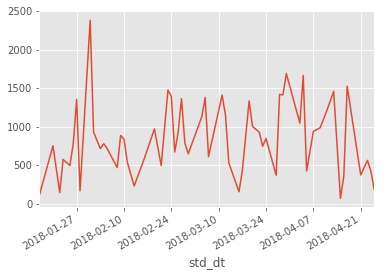

In [16]:
df.groupby('std_dt').payment.sum().plot()

In [41]:
a=df.groupby('user_id').std_dt.min()


user_id
100001   2018-01-31
100002   2018-02-11
100003   2018-02-16
100004   2018-01-28
100005   2018-01-20
100006   2018-02-09
100007   2018-02-04
100008   2018-01-31
100009   2018-01-27
100010   2018-01-16
100011   2018-03-30
100012   2018-02-08
100013   2018-01-23
100014   2018-01-22
100015   2018-04-07
100016   2018-01-25
100017   2018-02-10
100018   2018-01-26
100019   2018-01-23
100020   2018-02-19
Name: std_dt, dtype: datetime64[ns]

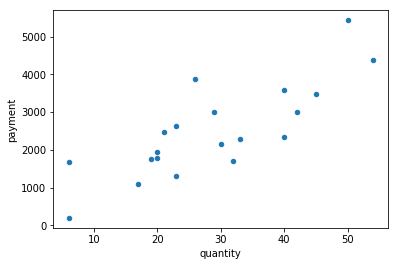

In [42]:
df.groupby('user_id').sum().plot.scatter(x='quantity',y='payment')

In [76]:
pivoted_counts=df.pivot_table(index='user_id',columns='std_dt',values='payment',aggfunc='count').fillna(0)
columns_month=df.std_dt.sort_values().astype('str').unique()
pivoted_counts.columns=columns_month
pivoted_counts

,2018-01-16,2018-01-20,2018-01-22,2018-01-23,2018-01-25,2018-01-26,2018-01-27,2018-01-28,2018-01-31,2018-02-01,...,2018-04-09,2018-04-11,2018-04-13,2018-04-15,2018-04-16,2018-04-17,2018-04-21,2018-04-23,2018-04-24,2018-04-25
user_id,,,,,,,,,,,,,,,,,,,,,
100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100009,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
pivoted_counts_transf=pivoted_counts.applymap(lambda x:1 if x>1 else 0 if x==1 else np.NaN)
pivoted_counts_transf

,2018-01-16,2018-01-20,2018-01-22,2018-01-23,2018-01-25,2018-01-26,2018-01-27,2018-01-28,2018-01-31,2018-02-01,...,2018-04-09,2018-04-11,2018-04-13,2018-04-15,2018-04-16,2018-04-17,2018-04-21,2018-04-23,2018-04-24,2018-04-25
user_id,,,,,,,,,,,,,,,,,,,,,
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
pivoted_counts_transf.count().head()

2018-01-16    1
2018-01-20    1
2018-01-22    1
2018-01-23    2
2018-01-25    1
dtype: int64

In [83]:
pivoted_counts_transf.sum().head()

2018-01-16    0.0
2018-01-20    0.0
2018-01-22    0.0
2018-01-23    0.0
2018-01-25    0.0
dtype: float64

In [105]:
df.groupby('user_id').std_dt.count().head()

user_id
100001     4
100002    10
100003     4
100004     6
100005     4
Name: std_dt, dtype: int64

In [107]:
s1=set()
for x in df.user_id:
    if x = 100001:
        print df.std_dt

SyntaxError: invalid syntax (<ipython-input-107-4a77f57bbc79>, line 4)

In [116]:
df.head()

,user_id,order_dt,quantity,payment,std_dt
0,100017,2018-02-10,3,841,2018-02-10
1,100004,2018-03-19,1,342,2018-03-19
2,100019,2018-04-16,5,164,2018-04-16
3,100016,2018-03-13,4,531,2018-03-13
4,100013,2018-01-23,7,158,2018-01-23


In [130]:
df.index

RangeIndex(start=0, stop=100, step=1)

KeyError: 2